In [1]:
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [2]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
y[:20]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [4]:
import pandas as pd
circles = pd.DataFrame({'X0':X[:,0],'X1':X[:,1],'label':y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


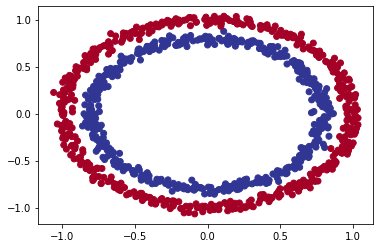

In [5]:
# visualize with plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu);

In [6]:
X.shape,y.shape

((1000, 2), (1000,))

In [7]:
len(X),len(y)

(1000, 1000)

In [8]:
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

In [9]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [10]:
# set random seed

tf.random.set_seed(42)

# create the model using sequential API 

model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)

])

# compile the model

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy']
                )

#fit the model
model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 4.1198 - accuracy: 0.4378
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7207 - accuracy: 0.5530
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7033 - accuracy: 0.4836
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5180
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5157


In [11]:
model_1.fit(X,y,epochs=200,verbose=0)

In [12]:
model_1.evaluate(X,y)

32/32 [==============================] - 0s 899us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [13]:
#new model

tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1),
                               tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_2.fit(X,y,epochs=100,verbose=0)

In [14]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 894us/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

In [15]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_3.fit(X,y, epochs=100,verbose=0)

In [16]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 936us/step - loss: 0.6980 - accuracy: 0.5080


[0.6980252861976624, 0.5080000162124634]

In [17]:
import numpy as np


In [18]:

def plot_predictions(model, X, y):
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min,x_max,100),
                       np.linspace(y_min,y_max,100))
  
  x_in = np.c_[xx.ravel(), yy.ravel()]

  #make predictions
  y_pred = model.predict(x_in)

  #check for multi class classification
  if len(y_pred[0])>1:
    print('doing multi-class classification')
    #we have to reshape our model
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)

  else:
    print('doing binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

  #plot the decision boundry

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0],X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)

  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())



doing binary classification


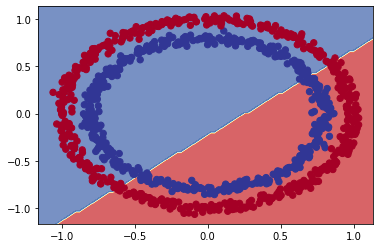

In [19]:
plot_predictions(model_3,X,y)

In [20]:
# create some regression data
tf.random.set_seed(42)

X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5)

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [ ]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

model_3.fit(X_reg_train,y_reg_train, epochs=100,verbose=1)

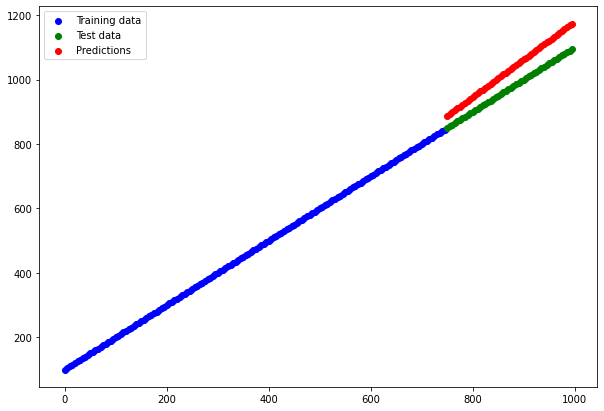

In [22]:
y_reg_preds = model_3.predict(X_reg_test)

# plot predictions
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train, c='b',label='Training data')
plt.scatter(X_reg_test,y_reg_test,c='g',label='Test data')
plt.scatter(X_reg_test,y_reg_preds,c='r',label='Predictions')
plt.legend();


In [23]:
tf.random.set_seed(42)
model_4 = tf.keras.Sequential([
                               
                               tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)
])

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history = model_4.fit(X,y, epochs=100,verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.6225 - accuracy: 0.4548
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3079 - accuracy: 0.4220
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.5266 - accuracy: 0.4276
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0583 - accuracy: 0.4295
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2318 - accuracy: 0.4045
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7724 - accuracy: 0.4447
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9616 - accuracy: 0.4212
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.6369 - accuracy: 0.4227
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9298 - accuracy: 0.3950
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.5803 - accuracy: 0.4409
Epoch 11/

In [24]:
tf.random.set_seed(42)
model_5 = tf.keras.Sequential([
                               
                               tf.keras.layers.Dense(4,activation='relu'),
                               tf.keras.layers.Dense(4,activation='relu'),
                               tf.keras.layers.Dense(1)
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history = model_5.fit(X,y, epochs=250,verbose=0)

doing binary classification


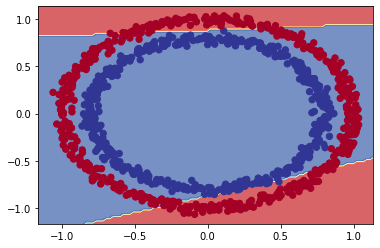

In [25]:
plot_predictions(model_5,X,y)

In [26]:
tf.random.set_seed(42)
model_6 = tf.keras.Sequential([
                               
                               tf.keras.layers.Dense(100,activation='relu'),
                               tf.keras.layers.Dense(100,activation='relu'),
                               tf.keras.layers.Dense(1,activation='sigmoid')
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history = model_6.fit(X,y, epochs=100,verbose=0)

doing binary classification


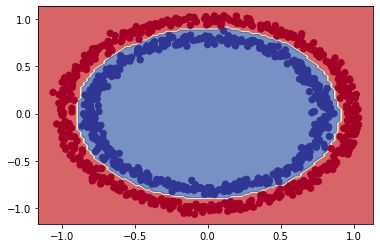

In [27]:
plot_predictions(model_6,X,y)

In [28]:
A = tf.cast(tf.range(-10,10),dtype=tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

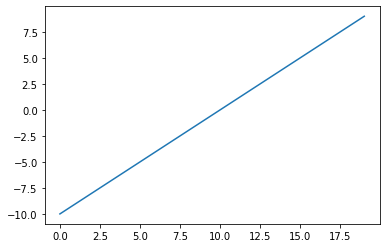

In [29]:
plt.plot(A)

In [30]:
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

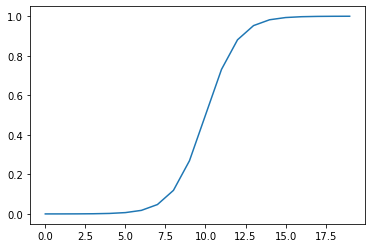

In [31]:
plt.plot(sigmoid(A))

In [32]:
def relu(x):
  return tf.maximum(0,x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

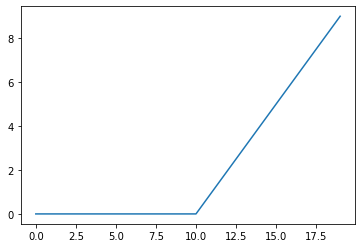

In [33]:
plt.plot(relu(A))

In [34]:
# create train test data

X_train,X_test = X[:800],X[800:]
y_train,y_test = y[:800],y[800:]

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [35]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100,activation='relu'),
                               tf.keras.layers.Dense(100,activation='relu'),
                               tf.keras.layers.Dense(1,activation='sigmoid')

]) 

model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=['accuracy'])

history= model_8.fit(X_train,y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5324
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6299 - accuracy: 0.6201
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.4260 - accuracy: 0.9102
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.1651 - accuracy: 0.9624
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.0600 - accuracy: 0.9949
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.0395 - accuracy: 0.9953
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.0210 - accuracy: 0.9984
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.0167 - accuracy: 0.9984
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.0346 - accuracy: 0.9864
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.0310 - accuracy: 0.9948
Epoch 11/25
25/25 [

In [36]:
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000


[0.0023903753608465195, 1.0]

doing binary classification


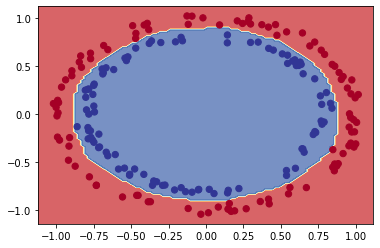

In [37]:
plot_predictions(model_8,X_test,y_test)

Text(0.5, 1.0, 'Model_8 loss curve')

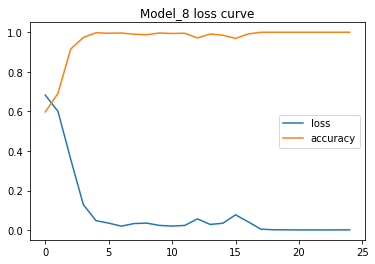

In [38]:
pd.DataFrame(history.history).plot()
plt.title('Model_8 loss curve')

In [39]:
loss, accuracy = model_8.evaluate(X_test,y_test)
print(f'Model loss on the test {loss}')
print(f'Model accuracy on the test {(accuracy*100):.2f}%')

7/7 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Model loss on the test 0.0023903753608465195
Model accuracy on the test 100.00%


In [40]:
# create a confusion matrix
from sklearn.metrics import confusion_matrix

y_preds = model_8.predict(X_test)


In [41]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [42]:
y_preds[:10]

array([[9.9951953e-01],
       [9.9997723e-01],
       [9.9981433e-01],
       [9.9987960e-01],
       [4.1633844e-03],
       [7.4239338e-06],
       [9.9838829e-01],
       [2.0658779e-06],
       [9.9989581e-01],
       [2.1833748e-05]], dtype=float32)

In [43]:
confusion_matrix(y_test,tf.round(y_preds))

array([[101,   0],
       [  0,  99]])

# Working with larger example

In [44]:
import tensorflow as tf
from tensorflow.keras.datasets import  fashion_mnist

# the data is already sorted into training and test set

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [45]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [46]:
train_labels[0]

9

In [47]:
train_data[0].shape , train_labels[0].shape

((28, 28), ())

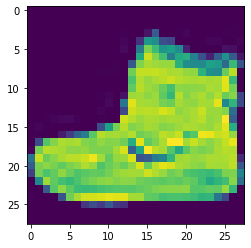

In [48]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

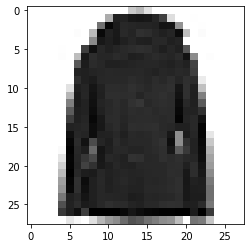

In [49]:

index_choice = 2000
plt.imshow(train_data[index_choice],cmap=plt.cm.binary)
#plt.title(class_names[train_labels[index_choice]])

In [65]:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

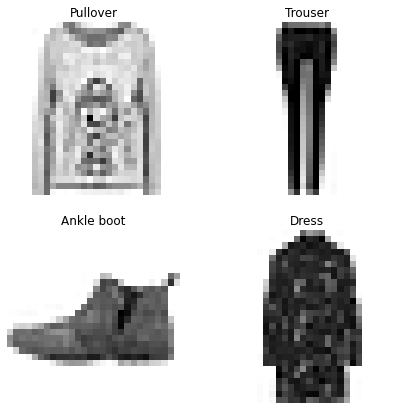

In [67]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

#Building a multi class classification

In [50]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(4,activation='relu'),
                                tf.keras.layers.Dense(4,activation='relu'),
                                tf.keras.layers.Dense(10,activation='softmax')
])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

non_norm_history = model_11.fit(train_data,train_labels, epochs=10, validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.8192 - accuracy: 0.1345 - val_loss: 1.7951 - val_accuracy: 0.2100
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7426 - accuracy: 0.2323 - val_loss: 1.6439 - val_accuracy: 0.3022
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6413 - accuracy: 0.2837 - val_loss: 1.6003 - val_accuracy: 0.2818
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6065 - accuracy: 0.2888 - val_loss: 1.5964 - val_accuracy: 0.2958
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5988 - accuracy: 0.3031 - val_loss: 1.5948 - val_accuracy: 0.3005
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5888 - accuracy: 0.3078 - val_loss: 1.5678 - val_accuracy: 0.3195
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5668 - accuracy: 0.3213 - val_loss: 1.5695 - val_accuracy:

In [51]:
# we can get training data and test data to 0,1 by dividing by maxvalue
train_data.min(),train_data.max()

(0, 255)

In [52]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [53]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(4,activation='relu'),
                                tf.keras.layers.Dense(4,activation='relu'),
                                tf.keras.layers.Dense(10,activation='softmax')
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

norm_history = model_12.fit(train_data_norm,train_labels, epochs=10, validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6479 - accuracy: 0.7706 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5984 - accuracy: 0.7902 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5767 - accuracy: 0.7986 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5611 - accuracy: 0.8017 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5562 - accuracy: 0.8030 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5458 - accuracy: 0.8076 - val_loss: 0.6097 - val_accuracy:

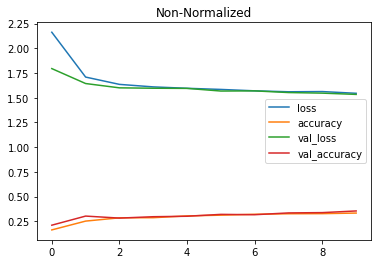

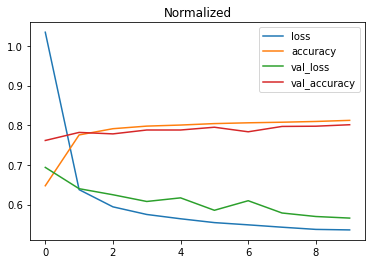

In [54]:
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title='Non-Normalized')
pd.DataFrame(norm_history.history).plot(title='Normalized')

#Finding the ideal learning rate

In [55]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(4,activation='relu'),
                                tf.keras.layers.Dense(4,activation='relu'),
                                tf.keras.layers.Dense(10,activation='softmax')

])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

#create learning rate callbacks
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20))

find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm,test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6479 - accuracy: 0.7707 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5978 - accuracy: 0.7901 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5768 - accuracy: 0.7978 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5630 - accuracy: 0.7995 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5577 - accuracy: 0.8003 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5506 - accuracy: 0.8043 - val_loss: 0.5898 - val_accuracy:

Text(0.5, 1.0, 'Finding the ideal learning rate')

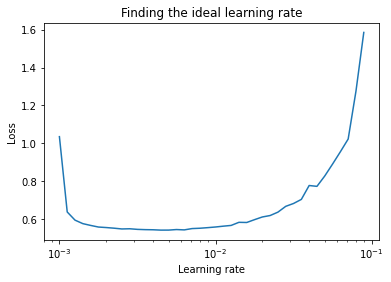

In [56]:
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Finding the ideal learning rate')


In [57]:
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(4,activation='relu'),
                                tf.keras.layers.Dense(4,activation='relu'),
                                tf.keras.layers.Dense(10,activation='softmax')

])

model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=['accuracy'])



history_14 = model_14.fit(train_data_norm,
                               train_labels,
                               epochs=20,
                               validation_data=(test_data_norm,test_labels))
                               

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6479 - accuracy: 0.7706 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5984 - accuracy: 0.7902 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5767 - accuracy: 0.7986 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5611 - accuracy: 0.8017 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5562 - accuracy: 0.8030 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5458 - accuracy: 0.8076 - val_loss: 0.6097 - val_accuracy:

In [59]:
y_probs = model_14.predict(test_data_norm)
y_probs[:5]

array([[8.5630336e-11, 3.5361509e-13, 2.6633865e-05, 4.6356046e-08,
        5.0950021e-05, 9.6119225e-02, 8.1778381e-08, 9.1868617e-02,
        4.0605213e-03, 8.0787390e-01],
       [3.4278683e-06, 1.2899412e-16, 9.5989138e-01, 2.0516255e-07,
        1.5329245e-02, 2.4532243e-13, 2.4142915e-02, 1.1383623e-28,
        6.3271803e-04, 4.4789552e-08],
       [6.1063176e-05, 9.9657673e-01, 4.3867061e-08, 3.3405994e-03,
        1.3249499e-05, 1.4383491e-21, 8.2790693e-06, 7.3237471e-18,
        5.4811817e-08, 4.9225428e-14],
       [7.5031145e-05, 9.9053687e-01, 4.2528288e-07, 9.2231687e-03,
        1.3623090e-04, 1.8276231e-18, 2.6808115e-05, 4.8124743e-14,
        1.4521548e-06, 2.2211462e-11],
       [7.2190031e-02, 1.5495797e-06, 2.5566885e-01, 1.0363121e-02,
        4.3541368e-02, 1.1069260e-13, 6.1693019e-01, 6.7543135e-23,
        1.3049162e-03, 1.2140360e-09]], dtype=float32)

In [61]:
y_preds = y_probs.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [64]:
import itertools
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

#Create confusion matrix

In [73]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  fig,ax = plt.subplots(figsize=figsize)
  
  # create matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  #set labels to classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  #label the axis
  ax.set(title='Confusion Matrix',
         xlabel='Predicted Label',
         ylabel='True Label',
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  threshold = (cm.max() + cm.min()) / 2.  # Set the threshold for different colors

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)




In [74]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

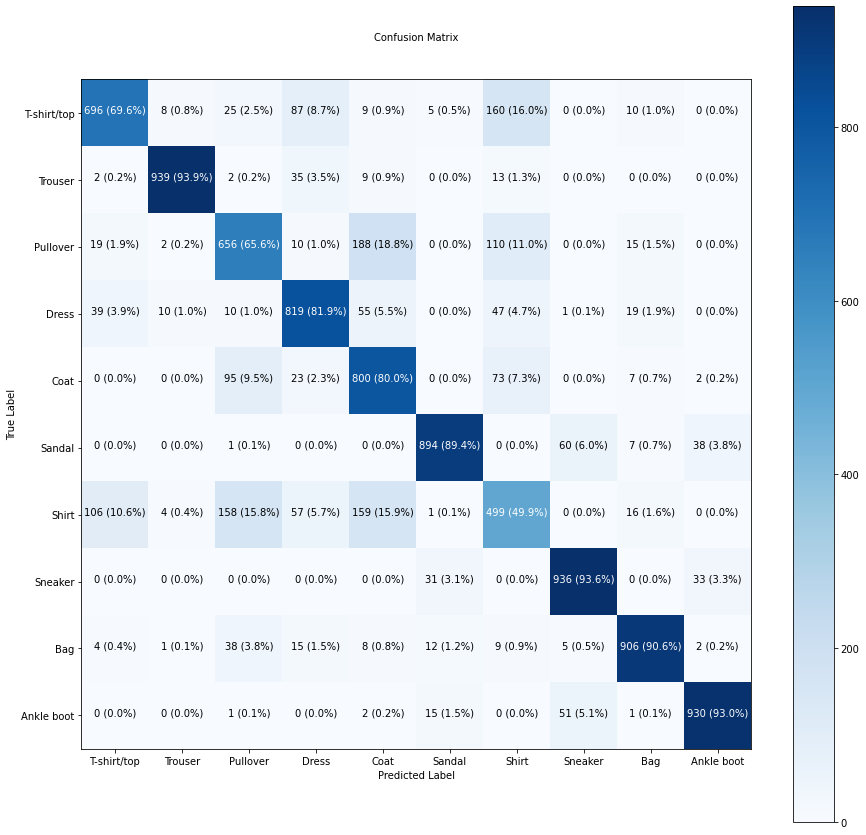

In [75]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)

In [81]:
import random

def plot_random_image(model, images, true_labels, classes):

  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),color=color)
                                                    # set the color to green or red

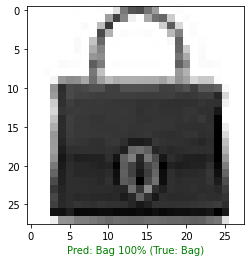

In [91]:
plot_random_image(model=model_14, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)